In [4]:
import pandas as pd
from nltk import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')         #For some reason this is not included in nltk and had to download separately
import numpy as np
import matplotlib.pyplot as plt
import operator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spiro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [34]:
def barplot(words, freq):
    
    X_axis=np.arange(20)
    
    plt.bar(x=X_axis, height=freq, width=0.8, label = 'Word Count')
    plt.xticks(X_axis, words, rotation = 90)              #Rotation 90 deg. so bar indexes do not cramp
    plt.xlabel("Words")
    plt.ylabel("Repetitions")
    plt.title("Word Frequencies")
    plt.legend()
    plt.show()

In [37]:
def analyze_movie(data,actor_name,stopwords):
    
    df= pd.read_csv(data, index_col="Title")    
    actor_col=df['Actors']
    
    new_df=pd.DataFrame()

    for actor in actor_col:
        if actor_name in actor:
            new_df=pd.concat([df[df['Actors']==actor],new_df],axis=0)
    desc=new_df['Description']

    word_pool=[]
    for description in desc:
        sentences=sent_tokenize(description)
        for sentence in sentences:
            words=word_tokenize(sentence)
            word_pool=word_pool+words

    wrd_count={}

    for word in word_pool:
    
        word=word.lower()
                
        if word not in stopwords:
            if word not in wrd_count: 
                wrd_count[word]=1
            else:
                wrd_count[word]=wrd_count[word]+1

    plot_words=sorted(wrd_count.items(), key=operator.itemgetter(1), reverse=True)
    
    words=[]                                   #Words List [x][0]
    freq=[]                                    #Word Frequencies [x][1]
    for word in range (20):                    #Only the first 20 Words
        words.append(plot_words[word][0])
        freq.append(plot_words[word][1])
    
    barplot(words, freq)
                    

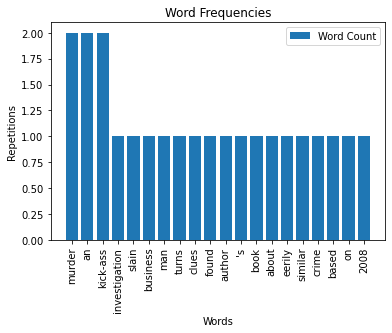

In [38]:
S=['a', 'the', 'he', 'she', 'to', ',', '.', 'and', 'of', 'in', 'as']

analyze_movie('IMDB-Movie-Data.csv', 'Jim Carrey', S)